# Analysis: no ionic steps, basic energies.

In [1]:
import pymatgen as mg
# from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.io.vasp.outputs import Oszicar, Eigenval, Outcar, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
OutBasics = Oszicar("OSZICAR")
print("Total energy:", OutBasics.final_energy)
print("All energies through each iteration:\n", OutBasics.all_energies)

Total energy: -18.464279 eV
All energies through each iteration:
 ((56.4322819995, -14.5966357823, -19.7317492734, -19.7684425446, -19.7685120254, -18.8391645024, -18.479222323, -18.4703198622, -18.4689443206, -18.4634612955, -18.4626998537, -18.4627995353, -18.4636304337, -18.4636503855, -18.463924364, -18.464207154, -18.4642457653, -18.464299352, -18.4643021704, -18.4643040014, -18.4643040862, -18.4643041215, -18.4643041235, -18.464304),)


In [17]:
OutFull = Outcar("OUTCAR")
print("Stopped?", OutFull.is_stopped) # It probably didn't "stop" because we didn't compute relaxation.
# Add some more analysis here?

Stopped? False


# Analyze vasprun and DOS

In [2]:
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

# Get the full run daga and extract DOS
run = Vasprun("vasprun.xml", parse_projected_eigen=True)
dos = run.tdos
run = Vasprun("vasprun.xml", parse_projected_eigen=True)
print("Fermi energy:", run.efermi)
print("Number of ionic steps:", run.nionic_steps)
# print("Force constants:", run.force_constants)
# Just kidding! We havn't done phonon stuff yet.

Fermi energy: -2.72502119
Number of ionic steps: 1


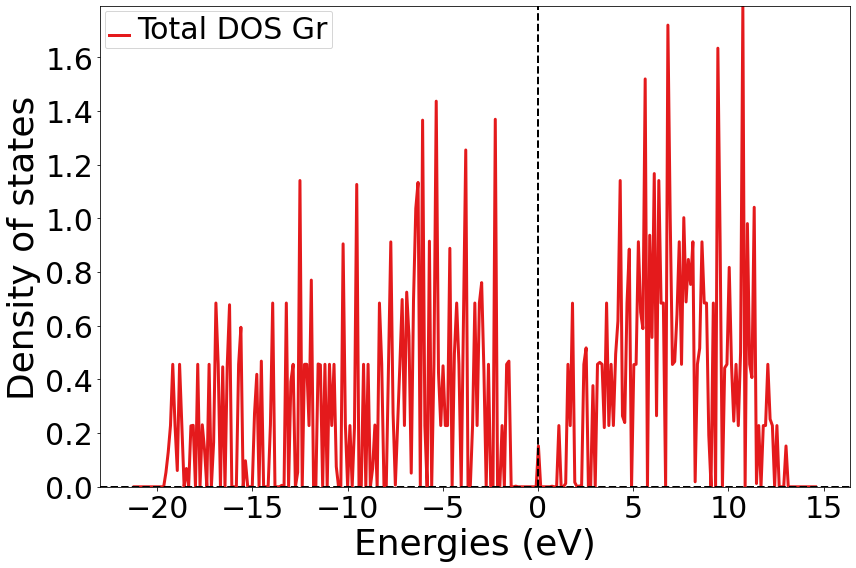

In [4]:
dosplot = DosPlotter()
dosplot.add_dos("Total DOS Gr", dos)
dosplot.show()